/tmp/ipykernel_50/392944403.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


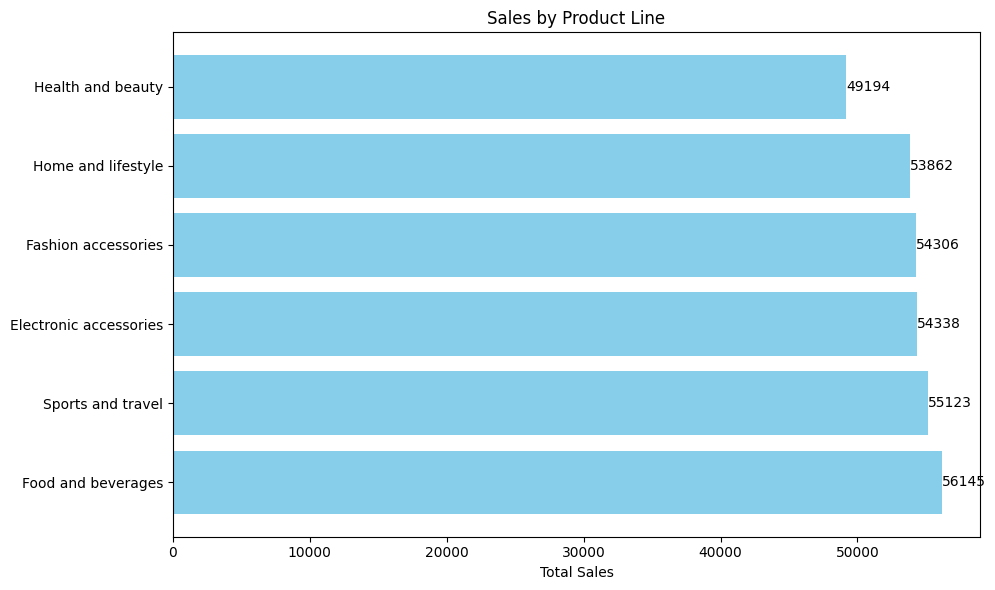

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

# DB接続設定
conn = psycopg2.connect(
    host="postgres",
    port=5432,
    dbname="mydb",
    user="myuser",
    password="mypassword"
)

# SQL: 商品カテゴリごとの売上を集計
query = """
SELECT
  product_line,
  SUM(sales_total) AS total_sales
FROM supermarket_sales
GROUP BY product_line
ORDER BY total_sales DESC;
"""

# データ取得
df = pd.read_sql_query(query, conn)
conn.close()

# グラフ表示
plt.figure(figsize=(10,6))
bars = plt.barh(df['product_line'], df['total_sales'], color='skyblue')
plt.xlabel("Total Sales")
plt.title("Sales by Product Line")
plt.tight_layout()

# 金額表示ラベル追加
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', va='center', ha='left')

plt.show()
